# Imports

In [26]:
import nltk
#from nltk import word_tokenize, pos_tag

#for viewing
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# NLTK Exploratory Code

In [27]:
string = "The gorgeous April spring devolved into a sombre May"
tokens = nltk.word_tokenize(string)

token_tags = nltk.pos_tag(tokens)
print("NLTK Tags:\n-----")
for tag in token_tags:
    print(tag)

NLTK Tags:
-----
('The', 'DT')
('gorgeous', 'JJ')
('April', 'NNP')
('spring', 'NN')
('devolved', 'VBD')
('into', 'IN')
('a', 'DT')
('sombre', 'NN')
('May', 'NNP')


# Model 1

    Own POS tagger: Trained using the Penn Treebank Project corpus.

#### Feature Definitions, Classifier Training & Testing

In [28]:
def features(token, idx):
    """The function takes in a token which is then
    subjected to some rules to extract features"""

    #print(tokens)
    
    #special character set for "has_special" feature
    chars = set("""!$%^&*_+|~-=`'{}()[]:";<>?,./""")
    
    features = {
        'word': token[idx],
        'is_capitalized': token[idx][0].isupper(),
        'is_all_lowercase': token[idx].islower(),
        'prefix-1': token[idx][0],
        'prefix-2': '' if len(token[idx]) < 2 else token[idx][1],
        'prefix-3': '' if len(token[idx]) < 3 else token[idx][2],
        'suffix-1': token[idx][-1],
        'suffix-2': '' if len(token[idx]) < 2 else token[idx][-2],
        'suffix-3': '' if len(token[idx]) < 3 else token[idx][-3],
        'prev_word': '' if idx == 0 else token[idx -1],
        'next_word': '' if idx == len(token) -1 else token[idx+1],
        'word_length': len(token[idx]),
        'only_numeric': token[idx].isnumeric(),
        'is_alphanumeric': token[idx].isalnum(),
        'is_camelCase': not token[idx][1:].islower(),
        'is_call_caps': token[idx].isupper(),
        'is_special': any([i for i in chars]) in [i for i in token[idx]],
        'has_hyphen': '-' in token[idx],
        'is_first_word': idx == 0,
        #'word_position': idx + 1,
        'is_last_word': idx == len(token) - 1
    }
    
    return features

In [29]:
def untag(tagged):
    """Helper function to strip the tags from a tagged corpus, the resultant
    is the list of tokens from the original 'tagged sentences' """
    
    tokens = [w for w, t in tagged]
    
    return tokens

In [30]:
#Penn Treebank corpus POS Tagger training
penn_taggs = nltk.corpus.treebank.tagged_sents()

#Penn training and testing sets, 80/20 split
size_penn = int(.8 * len(penn_taggs))
penn_train_sents = penn_taggs[:size_penn]
penn_test_sents = penn_taggs[size_penn:]


#Brown corpus POS Tagger training and testing
brwn_taggs = nltk.corpus.brown.tagged_sents()

#Brown training and testing sets, 80/20 split
size_brwn = int(0.8 * len(brwn_taggs))
brwn_train_sents = brwn_taggs[:size_brwn]
brwn_test_sents = brwn_taggs[:size_brwn]

def transform_to_dataset(tagged_sentences):
    """Transforms the training sentences set into signal X
    (features vector) and response y (tags vector) which
    will then be used to train & test the classifier."""
    
    X, y = [], []
    
    for tagged in tagged_sentences:
        for idx in range(len(tagged)):
            
            X.append(features(untag(tagged), idx))
            y.append(tagged[idx][1])
 
    return X, y
 
#Vectors which will be used to train Own POS Tagger
#Penn Training vectors
X_penn, y_penn = transform_to_dataset(penn_train_sents)
#Brown Training vectors
X_brwn, y_brwn = transform_to_dataset(brwn_train_sents)

#Testing Vectors
#Penn testing vectors
X_penn_test, y_penn_test = transform_to_dataset(penn_test_sents)
#Brown testing vectors[]
X_brwn_test, y_brwn_test = transform_to_dataset(brwn_test_sents)

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
import sklearn.pipeline as skpip

#DecisionTree bbjects which handle the training (i.e. fitting)
penn_clf =  skpip.Pipeline([('vectorizer', DictVectorizer(sparse=False)),
                       ('classifier', DecisionTreeClassifier(criterion='entropy'))])

brwn_clf = skpip.Pipeline([('vectorizer', DictVectorizer(sparse=False)),
                       ('classifier', DecisionTreeClassifier(criterion='entropy'))])

print("training...")
#Penn Treebank traning, only a portion is used for speed purposes
fit_size = 15000
penn_clf.fit(X_penn[:fit_size], y_penn[:fit_size])

#Brwon corpus training...
brwn_clf.fit(X_brwn[:fit_size], y_brwn[:fit_size])
print("Trainings complete!")



training...


Pipeline(memory=None,
     steps=[('vectorizer', DictVectorizer(dtype=<class 'numpy.float64'>, separator='=', sort=True,
        sparse=False)), ('classifier', DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])

Pipeline(memory=None,
     steps=[('vectorizer', DictVectorizer(dtype=<class 'numpy.float64'>, separator='=', sort=True,
        sparse=False)), ('classifier', DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])

Trainings complete!


In [32]:
#List to keep track of the scores
scores_list = []

#Kept getting MemoryError so evaluations will be done with a smaller sample
eval_size = 10000

#evaluation of Own POS Tagger ------------------------------------- Task 1.1 
own_score_penn = penn_clf.score(X_penn_test[:eval_size], y_penn_test[:eval_size])

#evaluation of Own POS Tagger ------------------------------------- Task 1.4
own_score_brwn = brwn_clf.score(X_brwn_test[:eval_size], y_brwn_test[:eval_size])

scores_list.append(("Task 1.1", own_score_penn))
scores_list.append(("Task 1.4", own_score_brwn))

print("Own Model on Penn Score: ", own_score_penn)
print("Own Model on Brown Score: ", own_score_brwn)

Own Model on Penn Score:  0.9134
Own Model on Brown Score:  0.9997


#### Comparison of Own and NLTK POS Classifiers

In [33]:
def own_pos_tagger(sentence):
    """This function uses the classifier 'clf' trained with Penn Treebank
    and our feature vector"""
    
    print('...tagging...\n')
    tagged_sentence = []
    tags = brwn_clf.predict([features(sentence, index) for index in range(len(sentence))])
    
    return zip(sentence, tags)

string = "The gorgeous April spring devolved into a sombre May"
tokens = nltk.word_tokenize(string)

#print out of Own POS tagger at work
own_tags = own_pos_tagger(tokens)
print("\n------OWN--------\n")
for tag in own_tags:
    print(tag)

print("\n------NLTK--------\n")

#print out of nltk POS tagger
token_tags = nltk.pos_tag(tokens)

for tag in token_tags:
    print(tag)

...tagging...


------OWN--------

('The', 'AT')
('gorgeous', 'JJ')
('April', 'NP')
('spring', 'VBG')
('devolved', 'VBD')
('into', 'IN')
('a', 'AT')
('sombre', 'NN')
('May', 'NP')

------NLTK--------

('The', 'DT')
('gorgeous', 'JJ')
('April', 'NNP')
('spring', 'NN')
('devolved', 'VBD')
('into', 'IN')
('a', 'DT')
('sombre', 'NN')
('May', 'NNP')


# Model 2

    MaxEntropy Classifier: An NLKT pre-trained POS tagger

In [34]:
#First the pre-trained (on Penn Treebank) maxent pos tagger is downloaded for use
    #nltk.download('maxent_treebank_pos_tagger')
    
#The pickle file holding the maxentropy trained model is loaded and is ready for use
pretrained_tagger = nltk.data.load('taggers/maxent_treebank_pos_tagger/english.pickle')

#the trained_classifier is fed with already tagged sentences (penn, brown, etc.)
#in the background it strips the tokens from its tags and use its own pre-trained 
#model to re-tag them, lastly it scores the new tags against the originals 

#Tagged sentences for the trainings
penn_taggs = nltk.corpus.treebank.tagged_sents()
brwn_taggs = nltk.corpus.brown.tagged_sents()

#evaluation of pre_trained tagger PENN------------------------------------- Task 1.2
penn_pt_score = pretrained_tagger.evaluate(penn_taggs[:1000])
scores_list.append(("Task 1.2", penn_pt_score))

#evaluation of pre-trained tagger BROWN ----------------------------------- Task 1.5
brwn_pt_score = pretrained_tagger.evaluate(brwn_taggs[:1000])
scores_list.append(("Task 1.5", brwn_pt_score))

# Model 3
    Trigram: An NLTK rule-based POS tagger

#### Training

In [35]:
#The tagged sentences used in this training were previsouly 
#initialized under the Model 2 cell as:
    #penn_taggs & brwn_taggs

#This code aims to train the TrigramTagger model using the Penn Treebank 
#and Brown corpora. The training sizes are established below. 80/20 split.
penn_size = int(len(penn_taggs)*0.8)
brwn_size = int(len(brwn_taggs)*0.8)

#penn treebank training and testing sets
penn_train_sents = penn_taggs[:penn_size]
penn_test_sents = penn_taggs[penn_size:]

#brown corpus training and testing sets
brwn_train_sents = brwn_taggs[:brwn_size]
brwn_test_sents = brwn_taggs[brwn_size:]

#Trigram training with Penn Treebank, Brown Corpus
penn_trigram_model = nltk.TrigramTagger(train = penn_train_sents)
brwn_trigram_model = nltk.TrigramTagger(train = brwn_train_sents)

#Bigram training with Penn Treebank, Brown Corpus
penn_bigram_model = nltk.BigramTagger(train = penn_train_sents)
brwn_bigram_model = nltk.BigramTagger(train = brwn_train_sents)

#Unigram training with Penn Treebank, Brown Corpus
penn_unigram_model = nltk.UnigramTagger(train = penn_train_sents)
brwn_unigram_model = nltk.UnigramTagger(train = brwn_train_sents)

#Default Tagger, tags everything with the same tag
default_tagg_model = nltk.DefaultTagger('NN')

#Regex Tagger, recognizes certain patterns and then tags them accordingly
patterns = [(r'.*ing$', 'VBG'), (r'.*ed$', 'VBD'), (r'.*es$', 'VBZ'), 
            (r'.*ould$', 'MD'), (r'.*\'s$', 'NN$'), (r'.*s$', 'NNS'), 
            (r'^-?[0-9]+(.[0-9]+)?$', 'CD'), (r'.*', 'NN')]

regexp_taggs_model = nltk.RegexpTagger(patterns)

#### Testing

In [36]:
#After the models have been trained they are tested and subsequently its tags are 
#checked against the ground-truth tags in the original training sentences
#Note: The Default and Regexp Taggers are not trainable
#Note: Only the testing set evaluation will be graphed

#=====================PENN=============================================

#Evaluation Scores ----------------------------------------- Task 1.3.1
penn_tg_score = penn_trigram_model.evaluate(penn_test_sents)
penn_tg_score_2 = penn_trigram_model.evaluate(penn_train_sents)
scores_list.append(("Task 1.3.1", penn_tg_score))

#Evaluation Scores ----------------------------------------- Task 1.3.2
penn_bg_score = penn_bigram_model.evaluate(penn_test_sents)
penn_bg_score_2 = penn_bigram_model.evaluate(penn_train_sents)
scores_list.append(("Task 1.3.2", penn_bg_score))

#Evaluation Scores ----------------------------------------- Task 1.3.3
penn_ug_score = penn_unigram_model.evaluate(penn_test_sents)
penn_ug_score_2 = penn_unigram_model.evaluate(penn_train_sents)
scores_list.append(("Task 1.3.3", penn_ug_score))
#Evaluation Scores ----------------------------------------- Task 1.3.4
penn_df_score = default_tagg_model.evaluate(penn_test_sents)
penn_df_score_2 = default_tagg_model.evaluate(penn_train_sents)
scores_list.append(("Task 1.3.4", penn_ug_score))

#Evaluation Scores ----------------------------------------- Task 1.3.5
penn_rx_score = regexp_taggs_model.evaluate(penn_test_sents)
penn_rx_score_2 = regexp_taggs_model.evaluate(penn_train_sents)
scores_list.append(("Task 1.3.5", penn_rx_score))

#=====================BROWN============================================

#Evaluation Scores ----------------------------------------- Task 1.6.1
brwn_tg_score = brwn_trigram_model.evaluate(brwn_test_sents)
brwn_tg_score_2 = brwn_trigram_model.evaluate(brwn_train_sents)
scores_list.append(("Task 1.6.1", brwn_tg_score))

#Evaluation Scores ----------------------------------------- Task 1.6.2
brwn_bg_score = penn_bigram_model.evaluate(brwn_test_sents)
brwn_bg_score_2 = penn_bigram_model.evaluate(brwn_train_sents)
scores_list.append(("Task 1.6.2", brwn_bg_score))

#Evaluation Scores ----------------------------------------- Task 1.6.3
brwn_ug_score = penn_unigram_model.evaluate(brwn_test_sents)
brwn_ug_score_2 = penn_unigram_model.evaluate(brwn_train_sents)
scores_list.append(("Task 1.6.3", brwn_bg_score))

#Evaluation Scores ----------------------------------------- Task 1.6.4
brwn_df_score = default_tagg_model.evaluate(brwn_test_sents)
brwn_df_score_2 = default_tagg_model.evaluate(brwn_train_sents)
scores_list.append(("Task 1.6.4", brwn_df_score))

#Evaluation Scores ----------------------------------------- Task 1.6.5
penn_rx_score = regexp_taggs_model.evaluate(brwn_test_sents)
brwn_rx_score_2 = regexp_taggs_model.evaluate(brwn_train_sents)
scores_list.append(("Task 1.6.5", penn_rx_score))


# Model 4
    
    Own POS Tagger trained on "Alpino Dutch Treebank"
    ID: alpino

In [37]:
#Dutch language corpus to be used for training
dutch_taggs = nltk.corpus.alpino.tagged_sents()

#80/20 split (training/testing)
size_dutch = int(.8 *len(dutch_taggs))
dutch_train_sents = dutch_taggs[:size_dutch]
dutch_test_sents = dutch_taggs[size_dutch:]

#Training vectors
X_dutch, y_dutch = transform_to_dataset(dutch_train_sents)

#Testing vecotrs
X_dutch_test, y_dutch_test = transform_to_dataset(dutch_test_sents)

#SKLEARN DecisionTree...
dutch_clf = skpip.Pipeline([('vectorizer', DictVectorizer(sparse=False)),
                       ('classifier', DecisionTreeClassifier(criterion='entropy'))])

print('training...')

#only a portion is used because of MEMORY ISSUES
fit_size = 15000
dutch_clf.fit(X_dutch[:fit_size], y_dutch[:fit_size])

print("Training complete")


#evaluation of Own POS Tagger on DUTCH language ----------------- Task 2.1
own_score_DUTCH = dutch_clf.score(X_dutch_test, y_dutch_test)
scores_list.append(("Task 2.1", own_score_DUTCH))
print("Own POS Tagger on Dutch Score: ", own_score_DUTCH)

training...


Pipeline(memory=None,
     steps=[('vectorizer', DictVectorizer(dtype=<class 'numpy.float64'>, separator='=', sort=True,
        sparse=False)), ('classifier', DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])

Training complete
Own POS Tagger on Dutch Score:  0.8614279986879032


## Graphs

15


[Text(0,0,'Model 1 X1'),
 Text(0,0,'Model 2 X1'),
 Text(0,0,'Model 3.1 X1'),
 Text(0,0,'Model 3.2 X1'),
 Text(0,0,'Model 3.3 X1'),
 Text(0,0,'Model 3.4 X1'),
 Text(0,0,'Model 3.5 X1'),
 Text(0,0,'Model 1 X2'),
 Text(0,0,'Model 2 X2'),
 Text(0,0,'Model 3.1 X2'),
 Text(0,0,'Model 3.2 X2'),
 Text(0,0,'Model 3.3 X2'),
 Text(0,0,'Model 3.4 X2'),
 Text(0,0,'Model 3.5 X2'),
 Text(0,0,'Model 1 on Dutch')]

Text(0.9134,0,'0.91')

Text(0.989875,1,'0.99')

Text(0.0673686,2,'0.07')

Text(0.113279,3,'0.11')

Text(0.860821,4,'0.86')

Text(0.860821,5,'0.86')

Text(0.242327,6,'0.24')

Text(0.9997,7,'1.0')

Text(0.588614,8,'0.59')

Text(0.191786,9,'0.19')

Text(0.0568726,10,'0.06')

Text(0.0568726,11,'0.06')

Text(0.109978,12,'0.11')

Text(0.175944,13,'0.18')

Text(0.861428,14,'0.86')

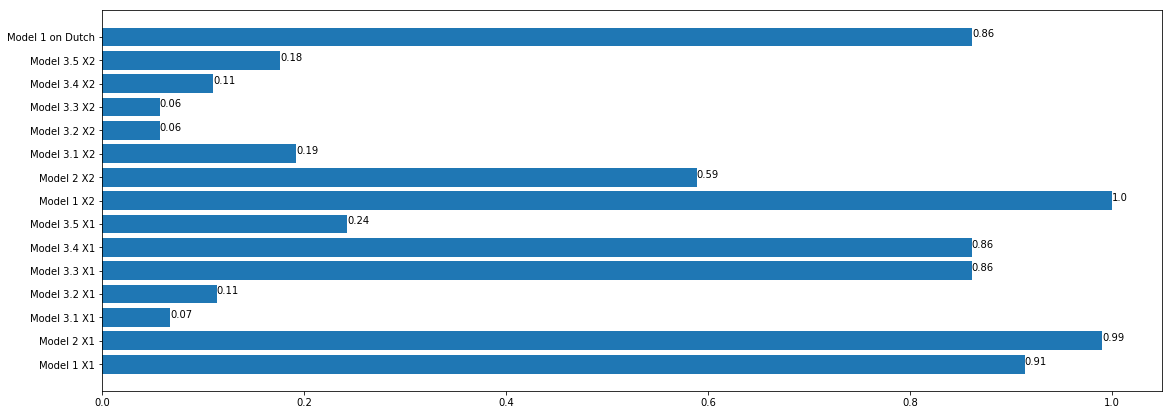

In [58]:
import matplotlib.pyplot as plt


scores = sorted(scores_list)
score_rn = []
for t,s in scores:
    score_rn.append(s)

print(len(score_rn))
    
labels = [each.strip() for each in 'Model 1 X1, Model 2 X1, Model 3.1 X1,\
          Model 3.2 X1, Model 3.3 X1, Model 3.4 X1, Model 3.5 X1, Model 1 X2,\
          Model 2 X2, Model 3.1 X2, Model 3.2 X2, Model 3.3 X2, Model 3.4 X2,\
          Model 3.5 X2, Model 1 on Dutch'.split(',')]

fig, ax = plt.subplots(figsize=(19,7))

plot = ax.barh(range(len(score_rn)), score_rn)
ax.set_yticks(range(len(score_rn)))
ax.set_yticklabels(labels)

for i,v in enumerate(score_rn):
    ax.text(v,i, str(round(v,2)))
    
plt.show()

# Model 5

In [39]:
from pSCRDRtagger.RDRPOSTagger import RDRPOSTagger

###I coulndn't get this library to open up 

ModuleNotFoundError: No module named 'pSCRDRtagger'